In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target


/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(3.9891,-0.675401,'0'),
  Text(-3.45621,-1.76034,'1'),
  Text(0.353937,-1.21336,'2'),
  Text(0.0513882,-1.81047,'3'),
  Text(-0.366181,2.25217,'4'),
  Text(0.436824,-0.443415,'5'),
  Text(0.6317,-0.236543,'6'),
  Text(-1.11631,2.53375,'7'),
  Text(-0.250675,-0.854456,'8'),
  Text(-0.720472,2.34708,'9')])

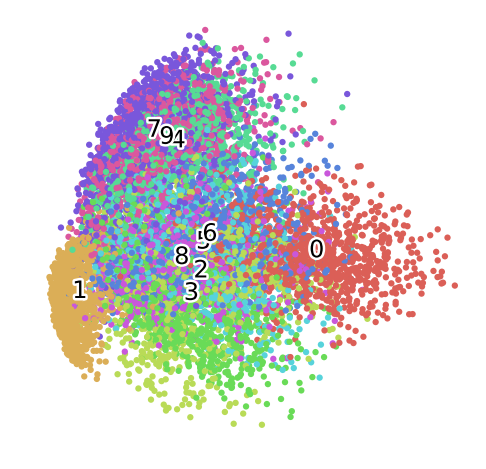

In [4]:
from sklearn.decomposition import PCA
index = np.random.permutation(X.shape[0])
X, y = X[index], y[index]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X[:10000])
fashion_scatter(pca_result,y[:10000])

(<Figure size 576x576 with 1 Axes>,
 [Text(16.8326,3.57146,'0'),
  Text(-13.9483,62.5656,'1'),
  Text(-8.39872,-25.7543,'2'),
  Text(-13.9718,-44.1608,'3'),
  Text(34.4844,21.6555,'4'),
  Text(-0.494238,-51.0146,'5'),
  Text(5.81372,7.38873,'6'),
  Text(-14.7749,20.529,'7'),
  Text(5.6675,-16.9646,'8'),
  Text(17.1659,-4.76716,'9')])

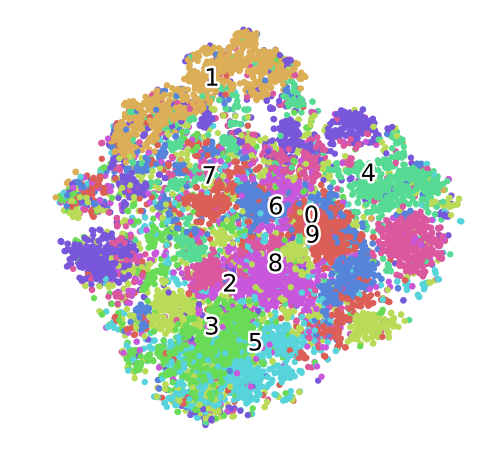

In [7]:
from sklearn.manifold import TSNE, Isomap
fashion_tsne = TSNE().fit_transform(high_x)
fashion_scatter(fashion_tsne,high_y)

In [6]:
high_x = np.load('result/data/test_x.npy')
high_y = np.load('result/data/test_y.npy')

In [75]:
np.unique(high_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.715841,-0.229555,'0'),
  Text(7.21661,-0.0261539,'1'),
  Text(-1.85026,0.0419976,'2'),
  Text(-2.77785,-0.247024,'3'),
  Text(0.430126,1.12735,'4'),
  Text(-3.27041,0.320915,'5'),
  Text(-0.630405,-0.227278,'6'),
  Text(0.489774,-0.484907,'7'),
  Text(-1.48528,0.230709,'8'),
  Text(-1.08113,0.7271,'9')])

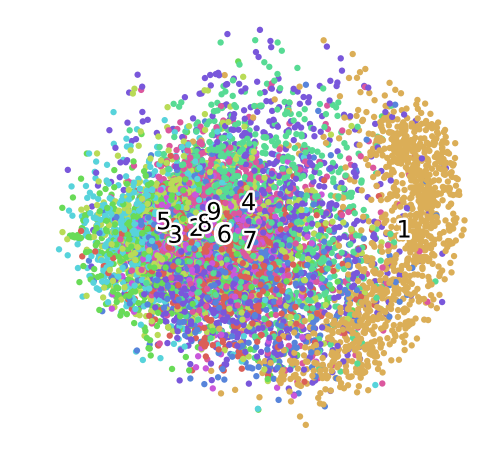

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(high_x)
pca_data = np.hstack([pca_result[:,0:1], pca_result[:, 2:3]])

fashion_scatter(pca_result,high_y)

(<Figure size 576x576 with 1 Axes>,
 [Text(0.00233507,-0.000118049,'0'),
  Text(-0.0198783,-0.0104255,'1'),
  Text(0.00411445,0.00257704,'2'),
  Text(0.00772651,0.00274942,'3'),
  Text(-0.00419744,0.00372571,'4'),
  Text(0.00784916,0.00569933,'5'),
  Text(0.00212358,-2.17215e-05,'6'),
  Text(-0.000669941,-0.00214913,'7'),
  Text(0.00329135,0.00281226,'8'),
  Text(0.000898238,0.0043499,'9')])

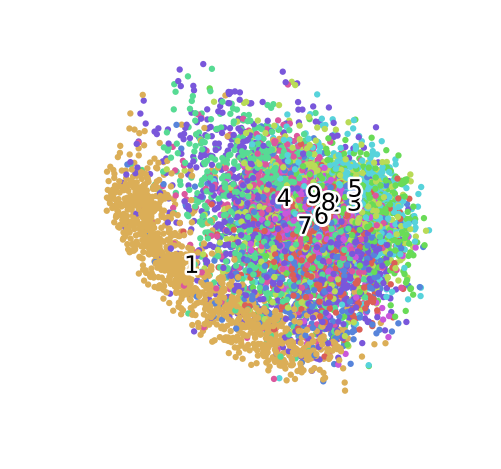

In [87]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
ica_result = ica.fit_transform(high_x)
fashion_scatter(ica_result,high_y)

(<Figure size 576x576 with 1 Axes>,
 [Text(1.78206,-0.111646,'0'),
  Text(-21.4142,0.709669,'1'),
  Text(5.72122,-0.110558,'2'),
  Text(9.60751,1.39306,'3'),
  Text(-2.59322,-4.17597,'4'),
  Text(11.0778,-0.657195,'5'),
  Text(1.32024,0.160635,'6'),
  Text(-2.51036,2.37657,'7'),
  Text(4.2178,-1.60809,'8'),
  Text(2.95418,-2.91582,'9')])

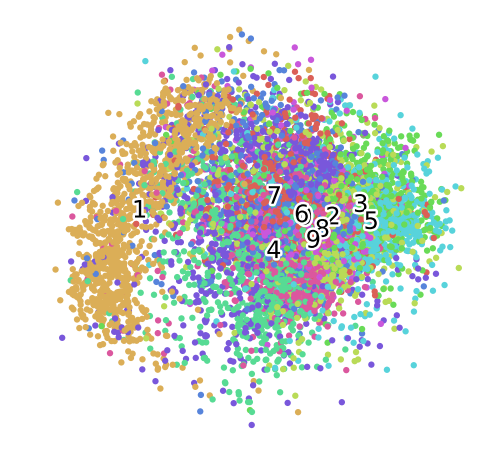

In [89]:
from sklearn.manifold import TSNE, Isomap

fashion_tsne = Isomap().fit_transform(high_x)
fashion_scatter(fashion_tsne,high_y)

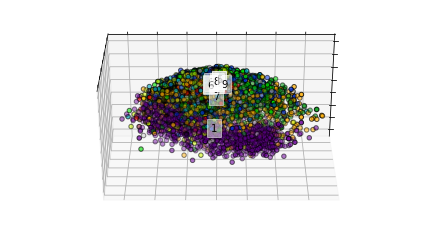

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[10, 0], [0, 0], [1, -1]]
iris = datasets.load_iris()
X = high_x
y = high_y

fig = plt.figure(1, figsize=(6, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 4, .95, 1], elev=120, azim=0)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('0',0),('1',1),('2',2),('3',3),('4',5),('5',5),('6',6),('7',7),('8',8),('9',9),]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [91]:
high_x = np.load('result/data/test_x.npy')
high_y = np.load('result/data/test_y.npy')
square_x =  high_x.reshape((10000, 10, 10))

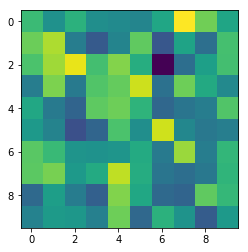

In [57]:
import numpy as np
weight1 = np.load('result/data/weight1.npy')
weight2 = np.load('result/data/weight2.npy')

In [58]:
weight1.shape

(30, 4, 7, 7)

In [59]:
weight2.shape

(100, 30, 7, 7)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


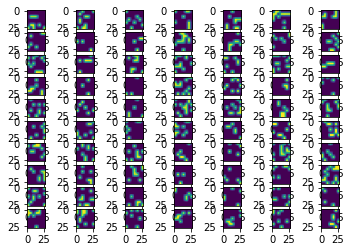

In [60]:
import matplotlib.pyplot as plt
from scipy.misc import imresize
fig, ax = plt.subplots(nrows=10, ncols=7 )

# w = np.zeros((7, 7))
# for c in weight2[90]:
#     c[c<np.amax(c)] = 0
#     w += c

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        w = weight2[i, j]
        w[w<0.82] = 0
        w = imresize(w, (28, 28))
        col.imshow(w)

plt.imshow(w)
plt.show()

In [110]:
data0 = np.load('result/data/0_activation.npz')

In [111]:
ori = data0['ori']
pot = data0['pot']

In [64]:
ori = ori[:10]

In [65]:
ori.shape

(10, 30, 4, 38, 38)

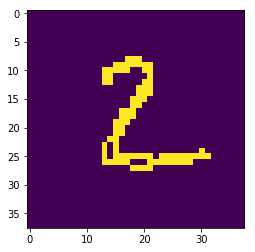

In [66]:
img = ori[1,29,0]
plt.imshow(img)
plt.show()

In [67]:
pot.shape

(30, 100, 14, 14)

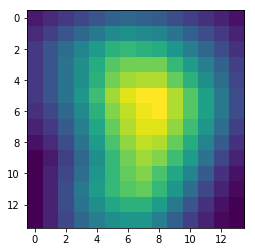

In [112]:
pot_img = None
for p in pot[-1]:
    if pot_img is None:
        pot_img = p
    else:
        pot_img += p

plt.imshow(pot_img)
plt.show()

In [71]:
data1 = np.load('result/data/0_activation.npz')
ori = data0['ori']
pot = data0['pot']
print (ori.shape)
print (pot.shape)

(1000, 30, 4, 38, 38)
(30, 100, 14, 14)


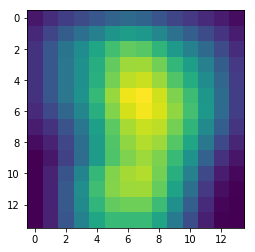

In [73]:
pot_img = pot.mean(axis=(0,1))
plt.imshow(pot_img)
plt.show()

In [164]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

train_samples = 60000
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

#X_train = X_train[:10000]
#y_train = y_train[:10000]

clf = SVC()
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print ("acc is ", acc)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NameError: name 'accuracy_score' is not defined